# ***Fake News Detection***


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
#"class" coloumn is target feature, for fake it is 0 and 1 stands for true

df_fake["class"] = 0
df_true["class"] = 1

In [5]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [6]:
#removing last 10 rows for manual testing

df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [7]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [8]:
#target feature "class"

df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_6280\440530969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_6280\440530969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [9]:
df_fake_manual_testing.head(5)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [10]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [11]:
df_marge = pd.concat([df_fake, df_true], axis =0 )

In [12]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [13]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [14]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [15]:
df = df.sample(frac = 1)

In [16]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [17]:
df.columns

Index(['text', 'class'], dtype='object')

In [18]:
df.head(5)

,text,class
0,WASHINGTON (Reuters) - U.S. House Democratic L...,1
1,21st Century Wire says It was an awkward fit o...,0
2,WASHINGTON (Reuters) - Seven Democratic senato...,1
3,If there is one reason to vote for Hillary Cli...,0
4,HARARE (Reuters) - Zimbabwe opposition leader ...,1




###Word Droping###

In [19]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [20]:
df["text"] = df["text"].apply(wordopt)

In [21]:
x = df["text"]
y = df["class"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [23]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regresion

In [24]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
pred_lr=LR.predict(xv_test)

In [44]:
LR.score(xv_test, pred_lr)

ValueError: Expected 2D array, got 1D array instead:
array=[0 1 0 ... 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

*confusion matrix* 

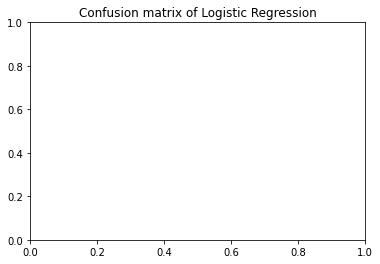

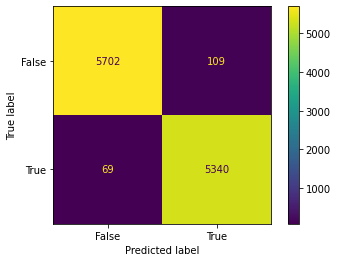

In [43]:
actual = y_test
predicted = pred_lr

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.title("Confusion matrix of Logistic Regression")
cm_display.plot()

In [27]:
s=LR.score(xv_test, y_test)
LRaccuracy=s*100
print("LR accuracy is: ",LRaccuracy,"%")

LR accuracy is:  98.41354723707664 %


## DecisionTree Classifier

In [28]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [29]:
pred_dt = DT.predict(xv_test)

In [30]:
s=DT.score(xv_test, y_test)
DTaccuracy=s*100
print("DT accuracy is: ",DTaccuracy,"%")

DT accuracy is:  99.59893048128342 %


## GDBoosting Classifier

In [31]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [32]:
pred_gbc = GBC.predict(xv_test)

In [33]:
s=GBC.score(xv_test, y_test)
GBCaccuracy=s*100
print("GBC accuracy is: ",GBCaccuracy,"%")

GBC accuracy is:  99.58110516934046 %


## RandomForest Classifier

In [34]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
pred_rfc = RFC.predict(xv_test)

In [36]:
s=RFC.score(xv_test, y_test)
RFCaccuracy=s*100
print("RFC accuracy is: ",RFCaccuracy,"%")

RFC accuracy is:  98.84135472370767 %


In [37]:
print("Model Accuracy is:",(LRaccuracy+DTaccuracy+GBCaccuracy+RFCaccuracy)/4," %")

Model Accuracy is: 99.10873440285204  %


In [38]:
###Model Testing###

In [39]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [40]:
news = str(input())
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
